# <span style="color:#FF9671"> <b> Results and Analysis of the concatenated plots for each model </b> </span>

#### <span style="color:#FF9671"> Bruker kun test 1 og 2. Test 3 og fire viser seg å ikke være så nyttig </span>

<span style="color:#FF9671"> Tar heller direkte eksempler fra oversettelsene fra modellene </span>

**Ex. På perfekt transcripsjon hvor verbatim oversetter taller 14 istedn for ordet fjorten.**

input : | fly flue flette flakse flagg fjorten erter ekorn dykke dør | PER: 0.3870967741935484  | WER: 1.0,

output: | fly flue flette flakse flagg 14 erter ekorn dykker dør    | CER: 0.13793103448275862 | translated WER: 0.2, 

Lengde diff: 0,

ID: d17

global score: 5

fil: words_240_250.wav,../3x10_Concatenations/3x10_score_5_sorted,NNL-medium-verbatim


--

The results from the randomized tests are a bit wrong. 

The randomization was not included whit a seed, so the models can not be compared for the random test, but fro the test where noting was changes.

<!-- ---
<span style="color:#D65DB1"> <b> Plot 1 </b> </span> : Plot boxplot of the target lengdt default for each global score.
    
    <!-- 1. For the 4 experiments for each model
    What model had better results when it comes to plotting? --> -->

<!-- -> Plot over the how many word over and under the target word length was.
    
    1. For the 3 experiments for each model
    What model had better results when it comes to plotting?

Plot 2 -> 

<span style="color:#F9F871"> F9F871 </span>
<span style="color:#FFC75F"> FFC75F </span>
<span style="color:#FF9671"> FF9671 </span>

<span style="color:#FF6F91"> FF6F91 </span>
<span style="color:#D65DB1"> D65DB1 </span>
<span style="color:#845EC2"> 845EC2 </span>

<span style="color:#00C0FF">#00C0FF </span>
<span style="color:#00D5F7">#00D5F7 </span>
<span style="color:#00E6DB">#00E6DB </span>

<span style="color:#58F2B3">#58F2B3 </span>
<span style="color:#ADF88B">#ADF88B </span>
<span style="color:#F9F871">#F9F871 </span> -->

## <span style="color:#58F2B3"> Library Imports </span>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import self_made_functions as smf
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

2024-07-07 10:18:23.500404: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-07 10:18:24.504693: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## <span style="color:#ADF88B"> Model and Test information

For Whisper model tiny, is the deviation in extra words transcribed big for the lower score, and it gets smaller for higher score, but then the outliers are way bigger than at the lower scores.

See: 
* Audio clip: 22 -> 210_220: Transcribed a longer sentence than the target sentence.
* Audio clip: 20 -> It has 23 unique transcriptions whit no extra words.


<span style="color:#FF6F91"> **Test categories:**

1. <span style="color:#FF9671"> Grouping by score, sorted IDs : <code> {model_name}__concatenated_audio_information_scores_id_sorted </code></span>
2. <span style="color:#FFC75F"> Grouping by score, mixed IDs  : <code> {model_name}__concatenated_audio_information_scores_id_mixed </code></span>

<!-- 3. <span style="color:#F9F871"> Grouping by IDs: sorted scores: <code> {model_name}__concatenated_audio_information_by_id</code> </span> -->
3. <span style="color:#F9F871"> Grouping by IDs: sorted scores: <code> {model_name}__concatenated_audio_information_group_id_sorted_score</code> </span>
4. <span style="color:#FF6F91"> Random shuffling: no group    : <code> {model_name}__concatenated_audio_information_no_group_mixed </code></span>

In [3]:
# models = ['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim',
#         'base', 'nb-whisper-base', 'nb-whisper-base-verbatim',
#         'medium', 'nb-whisper-medium', 'nb-whisper-medium-verbatim']

tests_1 = [
        'scores_id_sorted', # 1
        'scores_id_mixed'] # 2

tests_2 = [
        'group_id_sorted_score', # 3 
        'no_group_mixed'] # 4 

comparable_tests = [
        'scores_id_sorted', # 1
        'group_id_sorted_score'] # 3 

info_dir ='./Concat_results/corrected_data'
figure_dir = './Concat_results'

In [4]:
csv_lst = os.listdir(info_dir)
medium_verbatim_csv = [file for file in csv_lst if file.startswith('nb-whisper-medium-verbatim')]
# medium_verbatim_csv =[file for file in medium_verbatim_csv if file.endswith(tests_1[0]+'_v1.csv') or file.endswith(tests_1[1]+'_v1.csv')]
# test_1_lst =[file for file in medium_verbatim_csv if file.endswith(tests_1[0]+'_v1.csv') or file.endswith(tests_1[1]+'_v1.csv')]
medium_csv = [file for file in csv_lst if file.startswith('nb-whisper-medium')]

In [5]:
medium_verbatim_csv

['nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv',
 'nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv']

## **Test 1 and 2** : Plot CER/PER and WER - **Groupe: Score**

In [6]:
def plot_cer_wer_subplots(df: pd.DataFrame, save_dir: str, 
                        plot_type: str,   plt_score = True, 
                        model: str = 'nb-medium-verbatim',
                        model_name:str = 'NNL-Medium-Verbatim', 
                        name:str = None, save: bool = False):
    
    # Melt dataframes for CER and WER
    df_melted_cer = pd.melt(df, id_vars=['score'], value_vars=['PER', 'translated_CER'],
                            var_name='cer_type', value_name='cer_value')
    df_melted_wer = pd.melt(df, id_vars=['score'], value_vars=['WER', 'translated_WER'],
                            var_name='wer_type', value_name='wer_value')

    # Set up the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # -------------- Plot CER subplot ---------------- #
    # score_range = ['#d2e7e4', '#a6cfca', '#63aca2', '#20887a', '#1a6d62']
    score_range = ['#d2e7e4', '#a6cfca', '#63aca2', '#20887a', '#15574e']
    q1_cer = df.groupby('score')['translated_CER'].quantile(0.25)
    q3_cer = df.groupby('score')['translated_CER'].quantile(0.75)

    if plt_score:
        for score in range(1, 6):
            text_align = 4.8
            if score == 1:
                text_y = q3_cer[1]
                ax1.text(text_align, text_y, f'Score {score}', va='center', ha='center', color=score_range[-1], fontsize=12)
            elif score == 5:
                ax1.axhline(q3_cer[score], color='#C1554D', linestyle='--')
                ax1.axhspan(ymin=0, ymax=q3_cer[score], color=score_range[-1], alpha=0.5)

                text_y = (q1_cer[score] + q3_cer[score]) / 2
                ax1.text(text_align, text_y, f'Score {score}', va='center', ha='center', color=score_range[-1], fontsize=12)
            else:
                ax1.axhline(q3_cer[score], color='#C1554D', linestyle='--')
                ax1.axhspan(ymin=q3_cer[score], ymax=q3_cer[score + 1], color=score_range[score - 1], alpha=0.5)

                text_y = (q3_cer[score] + q3_cer[score + 1]) / 2
                ax1.text(text_align, text_y, f'Score {score}', va='center', ha='center', color=score_range[-1], fontsize=12)

    # best_color = '#2f4858' # Dark blue
    best_color = '#20887a' # Teal Green
    sns.boxplot(x='score', y='cer_value', hue='cer_type', data=df_melted_cer, ax=ax1, showfliers=False,
                palette=['#FFC75F', best_color], linewidth=1.5)

    chosen_colors = ['#FFC75F', best_color]
    chosen_names = ['PER: Target Words', f'CER: {model_name}']
    legend_patches = [mpatches.Patch(color=color, label=name) for name, color in zip(chosen_names, chosen_colors)]

    ax1.legend(handles=legend_patches, loc='best', frameon=False, shadow=False)
    ax1.set_title(f'PER versus CER', fontsize=17)
    ax1.set_xlabel('Global Score', fontsize=14)
    ax1.set_ylabel('PER & CER', fontsize=14)
    ax1.tick_params(axis='both', which='major', labelsize=13)

    # -------------- Plot WER subplot -------------- #
    q1_wer = df.groupby('score')['translated_WER'].quantile(0.25)
    q3_wer = df.groupby('score')['translated_WER'].quantile(0.75)

    if plt_score:
        for score in range(1, 6):
            if score == 1:
                text_y = q3_wer[1] + 0.1
                # text_y = q3_wer[1]
                ax2.text(text_align, text_y, f'Score {score}', va='center', ha='center', color=score_range[-1], fontsize=12)
            elif score == 5:
                ax2.axhline(q3_wer[score], color='#C1554D', linestyle='--')
                ax2.axhspan(ymin=0, ymax=q3_wer[score], color=score_range[-1], alpha=0.5)

                text_y = (q1_wer[score] + q3_wer[score]) / 2
                ax2.text(text_align, text_y, f'Score {score}', va='center', ha='center', color=score_range[-1], fontsize=12)
            else:
                ax2.axhline(q3_wer[score], color='#C1554D', linestyle='--')
                ax2.axhspan(ymin=q3_wer[score], ymax=q3_wer[score + 1], color=score_range[score - 1], alpha=0.5)

                text_y = (q3_wer[score] + q3_wer[score + 1]) / 2
                ax2.text(text_align, text_y, f'Score {score}', va='center', ha='center', color=score_range[-1], fontsize=12)

    sns.boxplot(x='score', y='wer_value', hue='wer_type', data=df_melted_wer, ax=ax2, showfliers=False,
                palette=['#FFC75F', best_color], linewidth=1.5)

    chosen_names_wer = ['WER: Target Words', f'WER: {model_name}']
    legend_patches_wer = [mpatches.Patch(color=color, label=name) for name, color in
                        zip(chosen_names_wer, chosen_colors)]

    ax2.legend(handles=legend_patches_wer, loc='best', frameon=False, shadow=False)
    ax2.set_title(f'WER for target words versus. transcribed words', fontsize=17)
    ax2.set_xlabel('Global Score', fontsize=14)
    ax2.set_ylabel('WER', fontsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=13)

    # plt.title(f'Box Plot ', fontsize=17)
    fig.suptitle(f'Concatenated audio: {plot_type}', fontsize=20, y=1.02)
    plt.tight_layout()
    
    if save:
        save_dir = os.path.join(save_dir, f'concat_{model}_{name}.png')
        print(f'Saving figure to {save_dir}')
        plt.savefig(save_dir, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

### **Test 1 and 2** : NNL medium verbatim 

In [7]:
df_csv_sorted = pd.read_csv(os.path.join(info_dir, 'nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv')) 
df_csv_mixed = pd.read_csv(os.path.join(info_dir, 'nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv'))
# save = True
# plot_cer_wer_subplots(df_csv_sorted, save_dir = figure_dir, 
#                         model='nb-whisper-medium-verbatim', 
#                         model_name = 'NNL-Medium-Verbatim',
#                         plot_type='Grouped by score. Sorted by id', name = 'group_score_sorted_id' , save = save)

# plot_cer_wer_subplots(df_csv_mixed, save_dir = figure_dir, 
#                         model='nb-whisper-medium-verbatim', 
#                         model_name = 'NNL-Medium-Verbatim',
#                         plot_type='Grouped by score. Mixed ids', name = 'group_score_mixed_id', plt_score = False, save=save)

### **Test 1 and 2** : NNL medium

In [8]:
df_csv_sorted = pd.read_csv(os.path.join(info_dir, 'nb-whisper-medium__concatenated_audio_information_scores_id_sorted_v1.csv')) 
df_csv_mixed = pd.read_csv(os.path.join(info_dir, 'nb-whisper-medium__concatenated_audio_information_scores_id_mixed_v1.csv'))
save = True
plot_cer_wer_subplots(df_csv_sorted, save_dir = figure_dir, 
                        model='nb-whisper-medium', 
                        model_name = 'NNL-Medium',
                        plot_type='Grouped by score. Sorted by id', 
                        name = 'group_score_sorted_id' , save = save)

plot_cer_wer_subplots(df_csv_mixed, save_dir = figure_dir,
                        model='nb-whisper-medium', 
                        model_name = 'NNL-Medium',
                        plot_type='Grouped by score. Mixed id', 
                        name = 'group_score_mixed_id',plt_score = False , save = save)


Saving figure to ./Concat_results/concat_nb-whisper-medium_group_score_sorted_id.png
Saving figure to ./Concat_results/concat_nb-whisper-medium_group_score_mixed_id.png


## **Test 3 and 4** : Plot for CER/PER and WER - **Group: ID** 

In [129]:
def box_plots_id(best_model:pd.DataFrame, save_dir:str, 
                target:str = 'PER', trans:str = 'translated_CER', 
                name:str =  'per_cer_group_id_sorted_score',
                test:str = 'PER and CER', save:bool = False):
    # ------ Melt model, so PER and CER can be compared ------ #
    df_melted = pd.melt(best_model, id_vars=['speaker_id'], value_vars=[target, trans],
                        var_name='cer_type', value_name='cer_value') 
    df_melted_a = df_melted[df_melted['speaker_id'].str.contains('a')].copy() # Non Native
    df_melted_d = df_melted[df_melted['speaker_id'].str.contains('d')].copy() # Native 
    
    fig, ax = plt.subplots(1, 1, figsize=(25, 6))
    #  ----------  Boxplot ---------- #
    sns.boxplot(x='speaker_id', y='cer_value', hue='cer_type', data=df_melted_a, ax=ax, showfliers=False, palette=['#FFC75F', '#00966E'], linewidth=1.5)
    sns.boxplot(x='speaker_id', y='cer_value', hue='cer_type', data=df_melted_d, ax=ax, showfliers=False, palette=['#FFC75F', '#C1554D'], linewidth=1.5)
    
    #  ---------- Title and labels ---------- #
    plt.title(f"Concatenated audio: Grouped by ID. Sorted by Score - {test} for all IDs", fontsize=25)
    plt.xlabel("Speaker IDs", fontsize=18)
    plt.ylabel(f'PER & CER', fontsize=18)
    
    #  ---------- x- and y-axis ---------- #
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=16)
    
    #  ---------- Model legend box  ---------- # 
    chosen_colors = ['#FFC75F', '#00966E', '#C1554D']
    chosen_names = ['PER', 'CER Non Native', 'CER Native']
    legend_patches = [mpatches.Patch(color=color, label=name) for name, color in zip(chosen_names, chosen_colors)]

    # Add legend with custom settings
    legend = ax.legend(handles=legend_patches, loc='best', frameon=False, shadow=False)
    legend.get_frame().set_facecolor('#f0eeeb')  # Background color
    for text in legend.get_texts():
        text.set_fontsize('16')  # Legend text font size
    
    
    #  ---------- Save or Show ---------- #
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(save_dir, f'concat_{name}.png'), bbox_inches='tight')
        plt.close()
    else:
        plt.show()

### Correct PER and CER

Found Error in Calcualted PER and WER, so fixed this

In [112]:
file_path = './Concat_results/corrected_data/Not used/nb-whisper-medium-verbatim__concatenated_audio_information_group_id_sorted_score_v1.csv'
df_csv_id = pd.read_csv(file_path)

# ---- Script to fix the calculated PER and WER in - Grouped by ID, Sorted by Score  ---- #
import self_made_functions as smf
def make_str(w, id):
    return f'{id}_{w}.wav'

df_assesment, wv_path = smf.get_correct_df()
# df_csv_id['pron'] = None # Add if needed
for i, row in df_csv_id.iterrows():
    # Get the file names ------------
    id = row['speaker_id']
    word_lst = row['input_string'].split()
    map_dict = {'æ':'ae', 'ø':'oe', 'å':'aa'}
    word_lst = [word.translate(str.maketrans(map_dict)) for word in word_lst] # Copilot
    
    # get pronScore form assement df ------------
    words =[make_str(word, id) for word in word_lst]
    assesment_rows = df_assesment[df_assesment['File name'].isin(words)]
    assesment_rows = assesment_rows.reset_index(drop=True)
    
    # Calculate PER ------------
    pronScores = ' '.join(assesment_rows['pronScores'].astype(str))
    wrong_char = pronScores.count('0')
    total_char = len(pronScores)
    df_csv_id.loc[i, 'PER'] = wrong_char / total_char
    # print(row['PER'])
    
    # Calulate target WER ------------
    target = list(assesment_rows['pronScores'])
    word_len = len(target)
    count_words_with_zero = sum('0' in zero for zero in target)
    df_csv_id.loc[i, 'WER'] = count_words_with_zero / word_len    
    # print(row['WER'])
    # if row['WER'] < 1.0:
        # print(row['WER'])
    
    # # Add pronScore if needed
    # pron_lst = ','.join(assesment_rows['pronScores'].astype(str))
    # df_csv_id.loc[i, 'pron'] = pron_lst
    # # print(target)

    # print(, row['score'], row['PER'], row['CER'], row['translated_CER'], row['translated_WER'])
# print(words)
# print(word_len)
# print(assesment_rows['File name'])
# print(assesment_rows['pronScores'])
# print(target)
# print index = 20

### ID plot

In [131]:
save = True
box_plots_id(df_csv_id, save_dir = figure_dir, save = save)
box_plots_id(df_csv_id, save_dir = figure_dir, 
            target = 'WER', trans = 'translated_WER',
            name = 'wer_group_id_sorted_score', 
            test = 'WER', save = save)

Text(0, 0.5, 'CER')

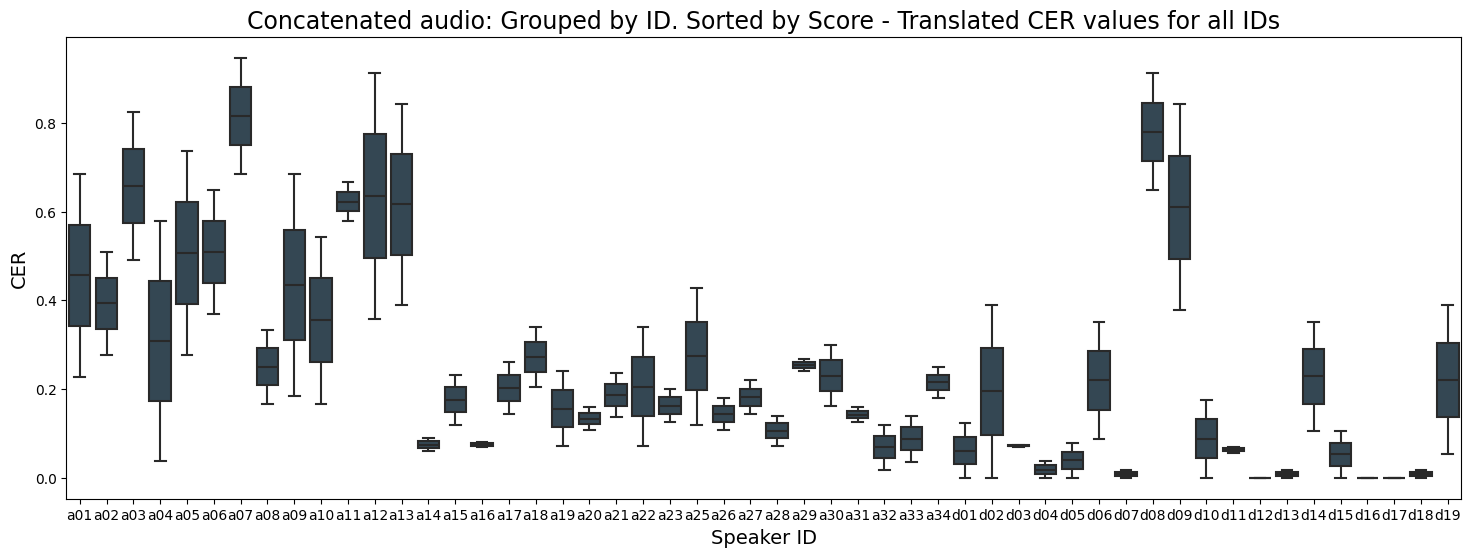

In [113]:

# df_csv_id = pd.read_csv('./Concat_results/corrected_data/nb-whisper-medium-verbatim__concatenated_audio_information_group_id_sorted_score_v1.csv')
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
best_color = '#2f4858'
sns.boxplot(x='speaker_id', y='translated_CER', data=df_csv_id, ax=ax, showfliers=False,
                color=best_color, linewidth=1.5)

ax.set_title(f'Concatenated audio: Grouped by ID. Sorted by Score - Translated CER values for all IDs', fontsize=17)
ax.set_xlabel('Speaker ID', fontsize=14)
ax.set_ylabel('CER', fontsize=14)


In [ ]:
df_csv_no_group

## Plot for NNL medium

In [194]:
# Make a table where the median value CER/PER and WER of each model fore each test is returned
# Median PER for each test
name = 'NNL-medium-verbatim'
per_calculated = the_chad_df[the_chad_df['model_name'] == name]['PER'] 
print(per_calculated.median())
# Calculate CER for each model in the_chad_df

model_lst = the_chad_df['model_name'].unique()
for model in model_lst:
    cer_calculated = the_chad_df[the_chad_df['model_name'] == model]['translated_CER'] 
    print(cer_calculated.median(), model)



0.40800477897252085
0.8052944862155389 Base
0.7961073318216175 Medium
0.7647058823529411 NNL-base
0.7905701754385965 NNL-base-verbatim
0.7623083131557707 NNL-medium
0.7759856630824373 NNL-medium-verbatim
0.7596296296296297 NNL-tiny
0.8336215842269111 NNL-tiny-verbatim
0.8198051948051948 Tiny
